In [2]:
#from https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import cross_validate, RandomizedSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
df = pd.read_csv("datasetFinal.csv")

In [3]:
df.head()

,hour,generated_power,temperatureC,dewpointC,pressurehPa,wind_direction_degrees,wind_speed_KMH,wind_speed_gustKMH,Humidity,hourly_precipMM,daily_rainMM,solar_radiation_Watts_m2
0,0,0,11,8,1021,143,0,20,83,0,0,0
1,1,0,11,8,1021,130,4,6,81,0,0,0
2,2,0,11,7,1020,121,0,6,80,0,0,0
3,3,0,11,7,1018,117,12,17,77,0,0,0
4,4,0,11,7,1018,117,0,17,77,0,0,0


In [4]:
# Separate Target Variable and Predictor Variables
TargetVariable = ["generated_power"]
Predictors= ["hour","temperatureC","dewpointC","pressurehPa","wind_direction_degrees","wind_speed_KMH","wind_speed_gustKMH","Humidity","hourly_precipMM","daily_rainMM","solar_radiation_Watts_m2"]

X=df[Predictors].values
y=df[TargetVariable].values

In [1]:
# y = df['generated_power'].values
# X = df.drop(columns=['generated_power']).values

NameError: name 'df' is not defined

In [29]:
# y = y.reshape(-1,1)


In [5]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


In [6]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 

In [7]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13580, 11)
(13580, 1)
(5821, 11)
(5821, 1)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [11]:

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
679/679 [==============================] - 1s 1ms/step - loss: 0.3974
Epoch 2/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1658
Epoch 3/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1459
Epoch 4/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1339
Epoch 5/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1261
Epoch 6/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1212
Epoch 7/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1177
Epoch 8/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1151
Epoch 9/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1131
Epoch 10/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1122
Epoch 11/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1104
Epoch 12/50
679/679 [==============================] - 1s 1ms/step - loss: 0.1092
Epoch 13/50
679/679 [====

# Hyperparameter tuning of ANN


# Finding best set of parameters using manual grid search


In [15]:
import numpy as np

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'MAPE:',MAPE,'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

182/182 [==============================] - 0s 969us/step
1 Parameters: batch_size: 5 - epochs: 5 MAPE: -35.95372365194563 Accuracy: 135.95372365194564


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 862us/step
2 Parameters: batch_size: 5 - epochs: 10 MAPE: -45.466781116761645 Accuracy: 145.46678111676164


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 969us/step
3 Parameters: batch_size: 5 - epochs: 50 MAPE: -51.88047012127676 Accuracy: 151.88047012127674


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 979us/step
4 Parameters: batch_size: 5 - epochs: 100 MAPE: -76.700396445481 Accuracy: 176.700396445481


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 962us/step
5 Parameters: batch_size: 10 - epochs: 5 MAPE: -64.31996601557118 Accuracy: 164.3199660155712


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 984us/step
6 Parameters: batch_size: 10 - epochs: 10 MAPE: -56.01079826594761 Accuracy: 156.0107982659476


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 873us/step
7 Parameters: batch_size: 10 - epochs: 50 MAPE: -56.995171239073464 Accuracy: 156.99517123907347


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 1ms/step
8 Parameters: batch_size: 10 - epochs: 100 MAPE: -73.20660392767718 Accuracy: 173.20660392767718


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 913us/step
9 Parameters: batch_size: 15 - epochs: 5 MAPE: -100.45000969317165 Accuracy: 200.45000969317164


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 929us/step
10 Parameters: batch_size: 15 - epochs: 10 MAPE: -52.27674485629402 Accuracy: 152.27674485629402


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 951us/step
11 Parameters: batch_size: 15 - epochs: 50 MAPE: -70.57360693654486 Accuracy: 170.57360693654488


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 926us/step
12 Parameters: batch_size: 15 - epochs: 100 MAPE: -38.760797151879785 Accuracy: 138.76079715187979


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 895us/step
13 Parameters: batch_size: 20 - epochs: 5 MAPE: -93.62190577706683 Accuracy: 193.62190577706684


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 1ms/step
14 Parameters: batch_size: 20 - epochs: 10 MAPE: -49.36694584116114 Accuracy: 149.36694584116114


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 933us/step
15 Parameters: batch_size: 20 - epochs: 50 MAPE: -63.67662637718549 Accuracy: 163.6766263771855


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


182/182 [==============================] - 0s 965us/step
16 Parameters: batch_size: 20 - epochs: 100 MAPE: -58.81683491449601 Accuracy: 158.816834914496


C:\Users\rafae\AppData\Local\Temp\ipykernel_18480\1551624262.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<AxesSubplot:xlabel='Parameters'>

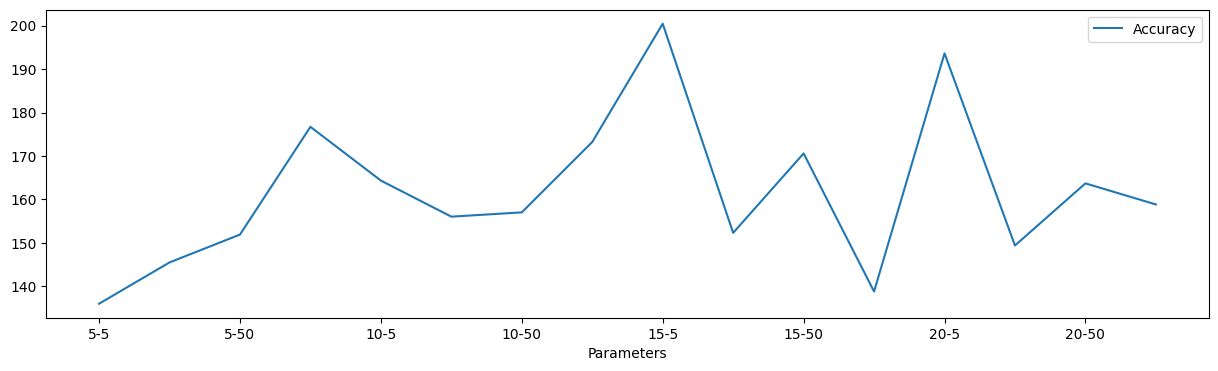

In [25]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [50]:
ResultsData

,TrialNumber,Parameters,Accuracy
0,1,5-5,-135.953724
0,2,5-10,-145.466781
0,3,5-50,-151.880470
0,4,5-100,-176.700396
0,5,10-5,-164.319966
0,6,10-10,-156.010798
0,7,10-50,-156.995171
0,8,10-100,-173.206604
0,9,15-5,-200.450010
0,10,15-10,-152.276745


In [51]:
ResultsDataPlot = ResultsData


In [52]:
ResultsDataPlot

,TrialNumber,Parameters,Accuracy
0,1,5-5,-135.953724
0,2,5-10,-145.466781
0,3,5-50,-151.880470
0,4,5-100,-176.700396
0,5,10-5,-164.319966
0,6,10-10,-156.010798
0,7,10-50,-156.995171
0,8,10-100,-173.206604
0,9,15-5,-200.450010
0,10,15-10,-152.276745


In [53]:
ResultsDataPlot["Accuracy"] = ResultsDataPlot["Accuracy"].add(100)

In [55]:
ResultsDataPlot["Accuracy"] = ResultsDataPlot["Accuracy"].multiply(-1)


In [56]:
ResultsDataPlot

,TrialNumber,Parameters,Accuracy
0,1,5-5,35.953724
0,2,5-10,45.466781
0,3,5-50,51.880470
0,4,5-100,76.700396
0,5,10-5,64.319966
0,6,10-10,56.010798
0,7,10-50,56.995171
0,8,10-100,73.206604
0,9,15-5,100.450010
0,10,15-10,52.276745


<AxesSubplot:xlabel='Parameters'>

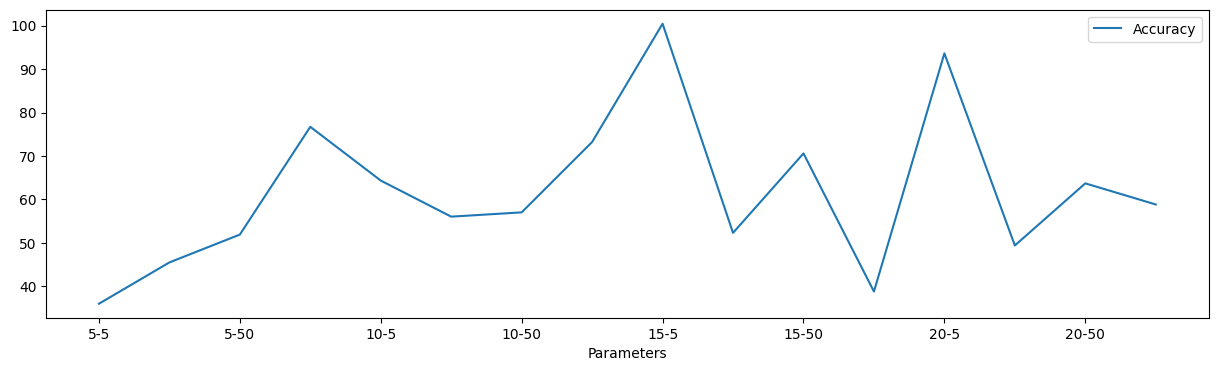

In [57]:
%matplotlib inline
ResultsDataPlot.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

# Training the ANN model with the best parameters


In [19]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Generation']=y_test_orig
TestingData['PredictedGeneration']=Predictions
TestingData.head()

182/182 [==============================] - 0s 1ms/step


,hour,temperatureC,dewpointC,pressurehPa,wind_direction_degrees,wind_speed_KMH,wind_speed_gustKMH,Humidity,hourly_precipMM,daily_rainMM,solar_radiation_Watts_m2,Generation,PredictedGeneration
0,17.0,12.0,10.0,1031.0,263.0,0.0,3.0,83.0,0.0,0.0,14.0,69.0,250.183456
1,15.0,25.0,18.0,1019.0,294.0,4.0,14.0,63.0,0.0,0.0,635.0,401.0,2281.578369
2,6.0,14.0,13.0,1026.0,206.0,10.0,17.0,97.0,0.0,0.0,0.0,0.0,68.535927
3,5.0,17.0,16.0,1018.0,263.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,67.197304
4,14.0,9.0,-2.0,1019.0,348.0,0.0,1.0,45.0,0.0,0.0,352.0,1297.0,1836.871826


In [23]:
# filter rows where column1 is equal to column2
filtered_data = TestingData.loc[TestingData['Generation'] == TestingData['PredictedGeneration']]

print(filtered_data)

Empty DataFrame
Columns: [hour, temperatureC, dewpointC, pressurehPa, wind_direction_degrees, wind_speed_KMH, wind_speed_gustKMH, Humidity, hourly_precipMM, daily_rainMM, solar_radiation_Watts_m2, Generation, PredictedGeneration]
Index: []


In [24]:
TestingData

,hour,temperatureC,dewpointC,pressurehPa,wind_direction_degrees,wind_speed_KMH,wind_speed_gustKMH,Humidity,hourly_precipMM,daily_rainMM,solar_radiation_Watts_m2,Generation,PredictedGeneration
0,17.0,12.0,10.0,1031.0,263.0,0.0,3.0,83.0,0.0,0.0,14.0,69.0,250.183456
1,15.0,25.0,18.0,1019.0,294.0,4.0,14.0,63.0,0.0,0.0,635.0,401.0,2281.578369
2,6.0,14.0,13.0,1026.0,206.0,10.0,17.0,97.0,0.0,0.0,0.0,0.0,68.535927
3,5.0,17.0,16.0,1018.0,263.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,67.197304
4,14.0,9.0,-2.0,1019.0,348.0,0.0,1.0,45.0,0.0,0.0,352.0,1297.0,1836.871826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,9.0,16.0,8.0,1020.0,122.0,3.0,11.0,60.0,0.0,0.0,192.0,202.0,621.317383
5817,12.0,21.0,17.0,1015.0,265.0,12.0,17.0,77.0,0.0,0.0,791.0,4937.0,4886.517090
5818,4.0,17.0,16.0,1020.0,321.0,0.0,4.0,95.0,0.0,0.0,0.0,0.0,33.435707
5819,11.0,13.0,8.0,1026.0,327.0,9.0,16.0,75.0,0.0,0.0,522.0,3114.0,3256.887207
